In [114]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [115]:
print(os.getcwd())
os.chdir('..')
print(os.getcwd())
data2 = pd.read_csv('reward_data_1.csv')
data1 = pd.read_csv('reward_data_1.csv')
data  = pd.read_csv('reward_data.csv')
ratio_data2 = pd.read_csv('reward_noise_2.csv')
ratio_data1 = pd.read_csv('reward_noise_1.csv')
ratio_data  = pd.read_csv('reward_noise.csv')
print(os.getcwd())
os.chdir('quadrupbot_env')

c:\Users\Duc Thien An Nguyen\Desktop\my_collections\Python\quadrupbot_env
c:\Users\Duc Thien An Nguyen\Desktop\my_collections\Python
c:\Users\Duc Thien An Nguyen\Desktop\my_collections\Python


In [116]:
data = data.append(data1)
data = data.append(data2)
ratio_data = ratio_data.append(ratio_data1)
ratio_data = ratio_data.append(ratio_data2)

C:\Users\Duc Thien An Nguyen\AppData\Local\Temp\ipykernel_11888\1563398112.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data1)
C:\Users\Duc Thien An Nguyen\AppData\Local\Temp\ipykernel_11888\1563398112.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(data2)
C:\Users\Duc Thien An Nguyen\AppData\Local\Temp\ipykernel_11888\1563398112.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratio_data = ratio_data.append(ratio_data1)
C:\Users\Duc Thien An Nguyen\AppData\Local\Temp\ipykernel_11888\1563398112.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ratio_data = ratio_data.append(ratio_dat

# Reward compare

In [117]:
data.loc[(data['Reward']<-1e5)|(data['Episode length']==2000)]

,Unnamed: 0,Reward,Episode length,Terrain type,Roughness
171,1,-1.000000e+10,244,Hills,0.05
178,8,-1.000000e+10,149,Hills,0.05
198,8,-9.999997e+09,1377,Combine,0.05
178,8,-1.000000e+10,149,Hills,0.05
198,8,-9.999997e+09,1377,Combine,0.05


In [118]:
clean_data = data.loc[(data['Reward']>0)&(data['Episode length']!=2000)]
clean_data.describe()

,Unnamed: 0,Reward,Episode length,Roughness
count,595.000000,595.000000,595.000000,595.000000
mean,4.482353,2698.870236,714.836975,0.029832
std,2.868781,839.273320,229.105680,0.014093
min,0.000000,1611.047889,470.000000,0.010000
25%,2.000000,2172.491058,569.000000,0.020000
50%,4.000000,2544.821354,659.000000,0.030000
75%,7.000000,2908.986291,774.000000,0.040000
max,9.000000,7664.986193,1895.000000,0.050000


In [119]:
clean_data['Time (second)'] = clean_data['Episode length']*(1./24.)
clean_data['Roughness (m)'] = clean_data['Roughness']

C:\Users\Duc Thien An Nguyen\AppData\Local\Temp\ipykernel_11888\32708963.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Time (second)'] = clean_data['Episode length']*(1./24.)
C:\Users\Duc Thien An Nguyen\AppData\Local\Temp\ipykernel_11888\32708963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Roughness (m)'] = clean_data['Roughness']


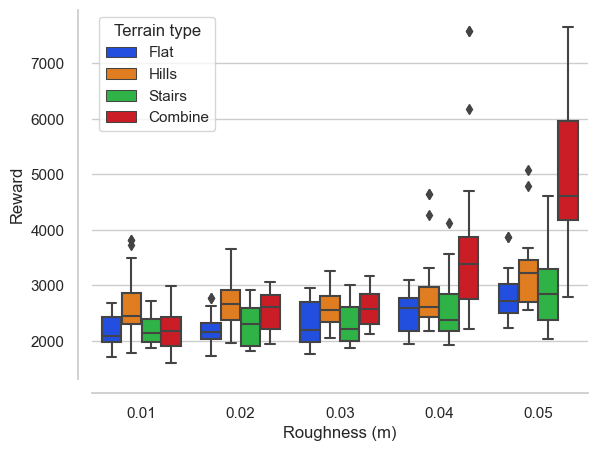

In [120]:
sns.set_theme(style="whitegrid", palette="bright")
plot = sns.boxplot(x="Roughness (m)", y="Reward",hue="Terrain type",data=clean_data)
sns.despine(offset=10)

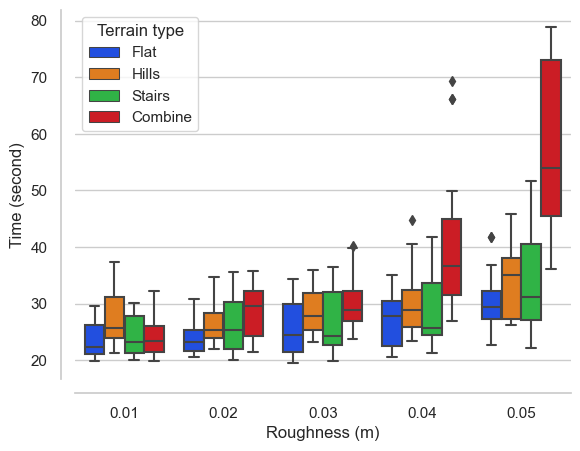

In [121]:
plot = sns.boxplot(x="Roughness (m)", y="Time (second)",hue="Terrain type",data=clean_data)
sns.despine(offset=10)

# Reward ratio

In [140]:
fail = ratio_data.loc[(ratio_data['Reward']<-1e5)|(ratio_data['Episode length']==2000)]
# for i in range(fail.shape[0]):
#     print(dict(fail.iloc[i,:]))
fail.loc[fail['Noise']==0.25]['Terrain type'].value_counts()

Combine    15
Hills       7
Flat        6
Stairs      4
Name: Terrain type, dtype: int64

In [123]:
success  = ratio_data.loc[(ratio_data['Reward']>0)&(ratio_data['Episode length']!=2000)]
success['Noise'].value_counts()

0.00    118
0.10    116
0.05    114
0.15    113
0.20    102
0.25     88
Name: Noise, dtype: int64